In [8]:
import dill
dill.load_session("notebook_env.db")

In [9]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(data_train.drop('label',axis=1),data_train['label'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
dt.score(data_test.drop('label',axis=1), data_test['label'])

0.9545454545454546

In [11]:
cluster_test=dt.predict(data_test.drop('label',axis=1))
print("Classification Report\n",classification_report(data_test.label,cluster_test))

Classification Report
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       391
           1       0.94      0.97      0.96       401

    accuracy                           0.95       792
   macro avg       0.96      0.95      0.95       792
weighted avg       0.96      0.95      0.95       792



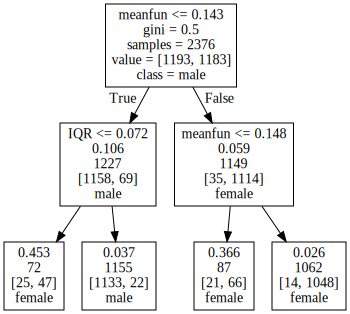

In [12]:
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=data_train.columns[:-1],class_names=["male","female"],rotate=False, label='root') 
graph = graphviz.Source(dot_data)
graph

In [14]:
dill.dump_session("notebook_env.db")